# Credit Card Fraud Prediction

With the increased usage of credit cards, as opposed to cash, in this digital age, making purchases for buyers has never been easier. Unfortunately, with millions of transactions existing exclusively digitally and occuring every second of the day, it is also a prime opportunity for fraudulant records to make their way into the mix. Given the vast amount of transactions that occur on a daily basis, it would be inefficient (if not impossible)and untimely for a human to review all the transactions for validity. The purpose of this analysis is to develop a supervised machine learning module that can detect fradulant transaction activity.

## Import appropriate Libraries

In [83]:
# importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os
import pickle
import gzip

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

## Data Understanding

The dataset was taken from Machine Learning Group - ULB on kaggle, [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). The following background information was supplied:

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

(This dataset) contains only numerical input variables which are the result of a PCA transformation....Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Data Loading and Prepocessing

Let's load our data in and take a high level look at what we are working with.

In [84]:
#check current directory, change if necessary
os.getcwd()
#chdir("C:/Users/andreacruz/Documents/University of Colorado, Boulder MSDS/Machine Learning/Introduction to Machine Learning/Week 7-Final Project")

#Import data from csv file
ccf_df = pd.read_csv('creditcard.csv')
#display first 20 rows to confirm
ccf_df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [36]:
#determine how much data we are dealing with
print(ccf_df.shape)
print("Unique values of 'Class':",pd.unique(ccf_df.Class))

(284807, 31)
Unique values of 'Class': [0 1]


Column "Class" only has 2 unique values, supporting binary classification of this data would be logical. 

In [ ]:
#check data for N/A values
ccf_df.isnull().sum()

Luckily, there are no null values detected. No instances will have to be dropped, supplemented with information, etc.

In [ ]:
#look at stats of dataframe
ccf_df.describe()

Taking a look at the statistics of the dataframe doesn't give us too much information because of the lack of context regarding the attributes (due to confidentiality) and their respective transformations. It does show us that all the attributes are numeric and continuous in nature (with the exception of "Class").

In [85]:
#determine distribution of class variable
temp_df = pd.DataFrame()
temp_df['Class'] = np.where(ccf_df['Class'] == 0, "Valid", "Fraud")
class_df = pd.DataFrame(temp_df['Class'].value_counts())
print(class_df)

        Class
Valid  284315
Fraud     492


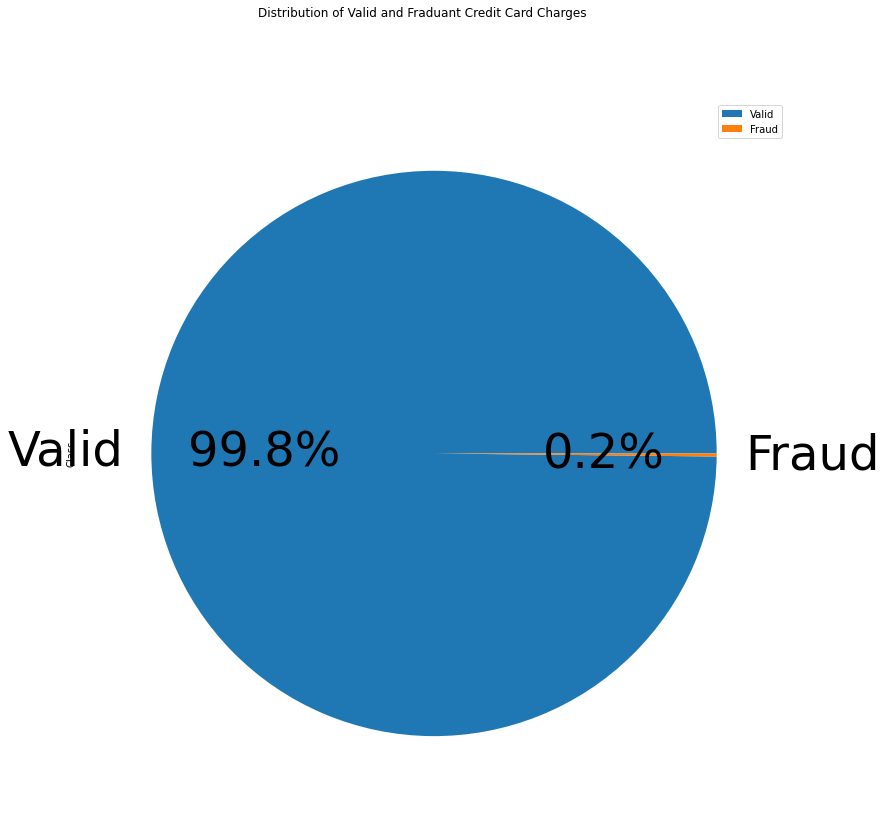

In [87]:
dist_pie = class_df.plot(kind = 'pie',figsize = (13,13),title = "Distribution of Valid and Fraduant Credit Card Charges", 
    autopct='%.1f%%', subplots = 'True',fontsize = 48)
plt.savefig('Distribution_valid_fraud_ccc.png')

 Based on this breakdown, 99.8% of the data is classified as "Valid" while 0.2% is classified as "Fradulant." For the purpose of this project this attribute is considered our "target attribute" and what we will attempt to predict. This also confirms the skewed distribution between the two classes, mentioned by the background information.

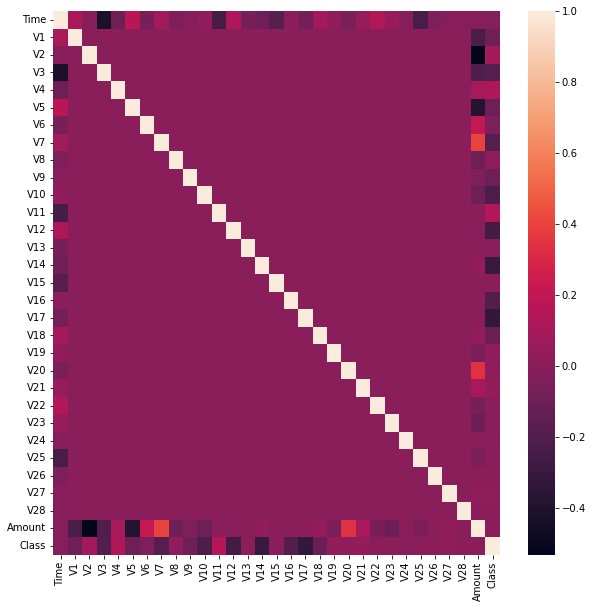

In [89]:
#Creating correlation matrix
ccf_corr_matrix = ccf_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(ccf_corr_matrix)
#plt.show()
plt.savefig('CorrelationMatrix_ccf.png')

Taking a look at the correlation, it does not appear that any one or a few attributes would be good candidates for leading indicators for predicting "Class".

array([[<AxesSubplot:xlabel='V17', ylabel='V17'>,
        <AxesSubplot:xlabel='V18', ylabel='V17'>,
        <AxesSubplot:xlabel='V19', ylabel='V17'>,
        <AxesSubplot:xlabel='V20', ylabel='V17'>,
        <AxesSubplot:xlabel='V21', ylabel='V17'>,
        <AxesSubplot:xlabel='V22', ylabel='V17'>,
        <AxesSubplot:xlabel='V23', ylabel='V17'>,
        <AxesSubplot:xlabel='V24', ylabel='V17'>,
        <AxesSubplot:xlabel='V25', ylabel='V17'>,
        <AxesSubplot:xlabel='V26', ylabel='V17'>],
       [<AxesSubplot:xlabel='V17', ylabel='V18'>,
        <AxesSubplot:xlabel='V18', ylabel='V18'>,
        <AxesSubplot:xlabel='V19', ylabel='V18'>,
        <AxesSubplot:xlabel='V20', ylabel='V18'>,
        <AxesSubplot:xlabel='V21', ylabel='V18'>,
        <AxesSubplot:xlabel='V22', ylabel='V18'>,
        <AxesSubplot:xlabel='V23', ylabel='V18'>,
        <AxesSubplot:xlabel='V24', ylabel='V18'>,
        <AxesSubplot:xlabel='V25', ylabel='V18'>,
        <AxesSubplot:xlabel='V26', ylabel='V18'>]

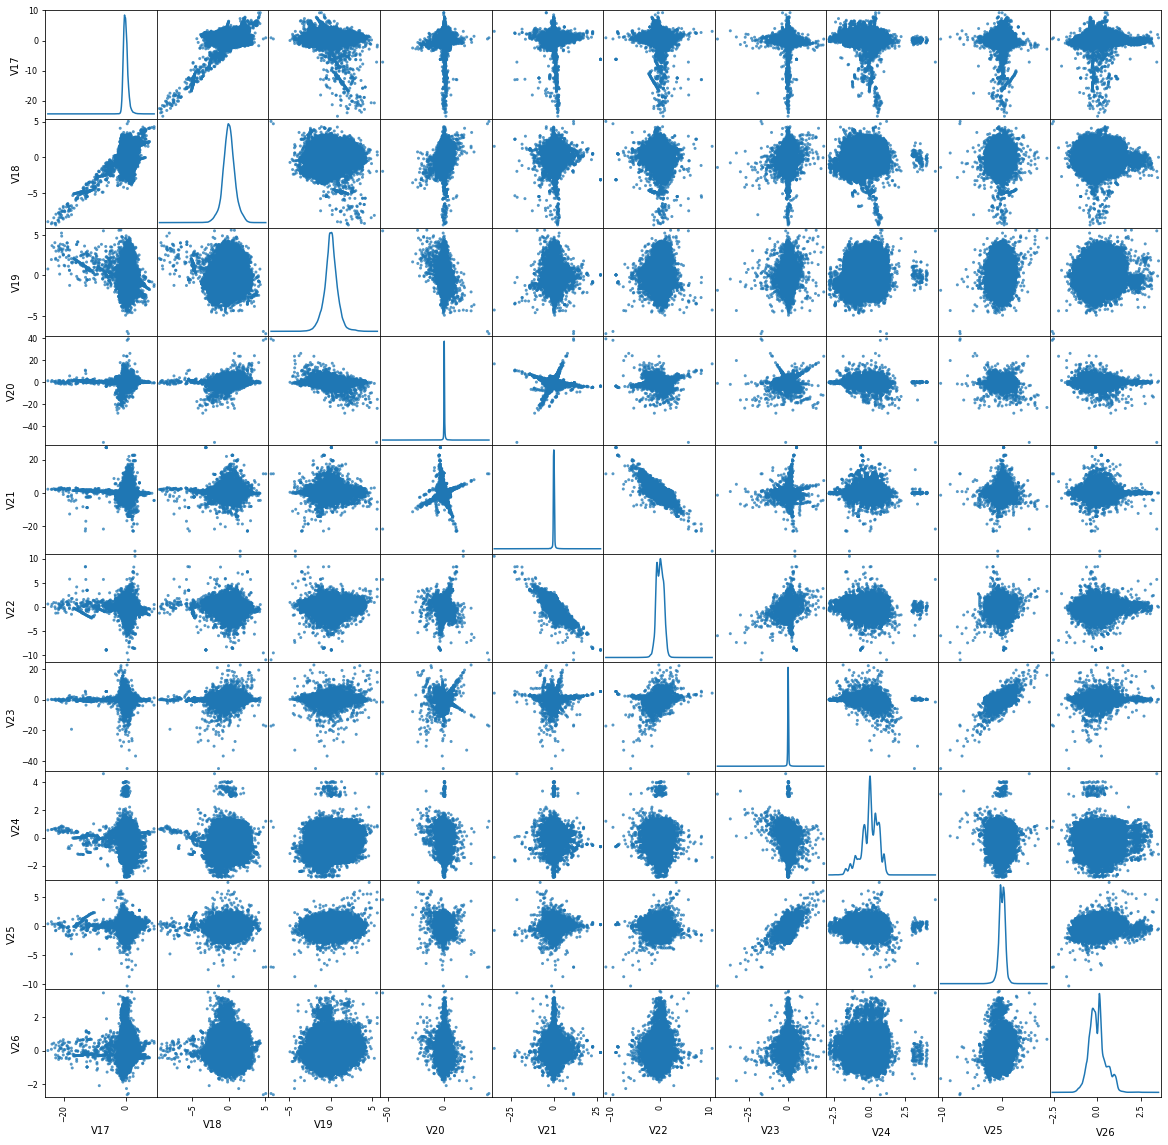

In [52]:
ccf_sub = ccf_df.iloc[:,17:27]
pd.plotting.scatter_matrix(ccf_sub, alpha=0.75, figsize=[20, 20], diagonal='kde')

Now let us prepare to implement different algorithms to implement a predictive model. We want to utilize the sklearn library with built in Logistic Regression and K Nearest Neighbors algorithims. To prepare the data for that function, the target attribute must be encoded from numerical data to categorical data. "Class" Variable was changed to type: category for this purpose.

In [38]:
print("initial column types \n", ccf_df.dtypes, "\n")
ccf_df['Class'] = ccf_df['Class'].astype('category')
print("Post column types \n Class", ccf_df['Class'].dtypes, "\n")

initial column types 
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object 

Post column types 
 Class category 



# Logistic Regression Implementation

Here, the Logistic Regression algorithm is used predict whether or not the transaction is fradulant or not.

We will first split the dataset into a training and testing datasets to avoid overfitting a model that performs well on our given dataset but fails to generalize on new, unseen data points. We will use this same split for training the K nearest neighbor algorithim later on.

In [39]:
#split dataset into training and test
ccf_train, ccf_test = train_test_split(ccf_df, test_size = 0.2, random_state = 123)

print(f"No. of training examples: {ccf_train.shape[0]}")
print(f"No. of testing examples: {ccf_test .shape[0]}")


No. of training examples: 227845
No. of testing examples: 56962


In [40]:
train_y = ccf_train["Class"]
ccf_train = ccf_train.drop(columns = ["Class", "Time"], axis = 1)
print(ccf_train.columns)

test_y = ccf_test["Class"]
ccf_test = ccf_test.drop(columns = ["Class", "Time"], axis = 1)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


Further split dataframes to isolate target variable and to drop "time" variable since that attribute serves more as a relative marker than an attribute to whether or not the transaction is fraud. [Precision Recall curve explanation](https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248)

99.9 % Accuracy


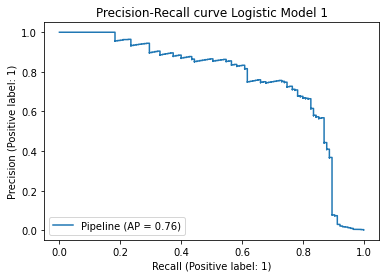

In [41]:
#using all attributes & standardizing
lr_clf = make_pipeline(StandardScaler(),LogisticRegression(random_state=123))
#LogisticRegression(random_state=123).fit(ccf_train, y)

lr_clf.fit(ccf_train, train_y)
y_pred = lr_clf.predict(ccf_test)

print(round(lr_clf.score(ccf_test, test_y)*100,2), "% Accuracy")
diplay = PrecisionRecallDisplay.from_estimator(lr_clf, ccf_test, test_y).ax_.set_title("Precision-Recall curve Logistic Model 1")


99.91 % Accuracy


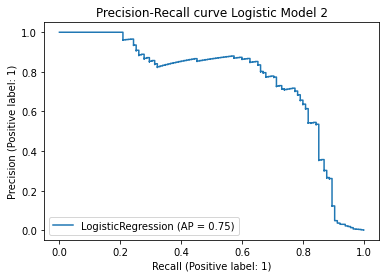

In [42]:
#using all attributes
lr_clf2 = LogisticRegression(random_state=123).fit(ccf_train, train_y)
print(round(lr_clf2.score(ccf_test, test_y)*100,2), "% Accuracy")
diplay2 = PrecisionRecallDisplay.from_estimator(lr_clf2, ccf_test, test_y).ax_.set_title("Precision-Recall curve Logistic Model 2")

99.89 % Accuracy


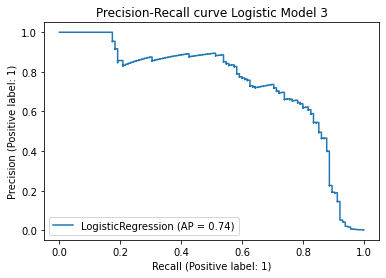

In [43]:
#subset attributes to predict (first 10 attributes)
ccf_train_sub = ccf_train.iloc[:,0:10]
ccf_test_sub = ccf_test.iloc[:,0:10]

lr_clf_sub = LogisticRegression(random_state=123).fit(ccf_train_sub, train_y)

print(round(lr_clf_sub.score(ccf_test_sub, test_y)*100,2), "% Accuracy")
diplaysub = PrecisionRecallDisplay.from_estimator(lr_clf_sub, ccf_test_sub, test_y).ax_.set_title("Precision-Recall curve Logistic Model 3")

99.85 % Accuracy


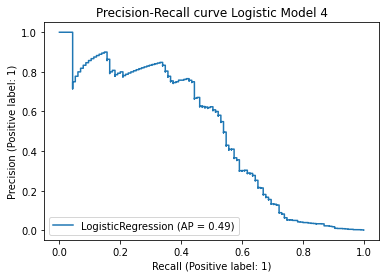

In [44]:
#subset attributes to predict (first 5 attributes)
ccf_train_sub2 = ccf_train.iloc[:,0:5]
ccf_test_sub2 = ccf_test.iloc[:,0:5]

lr_clf_sub2 = LogisticRegression(random_state=123).fit(ccf_train_sub2, train_y)
print(round(lr_clf_sub2.score(ccf_test_sub2, test_y)*100,2), "% Accuracy")
diplaysub2 = PrecisionRecallDisplay.from_estimator(lr_clf_sub2, ccf_test_sub2, test_y).ax_.set_title("Precision-Recall curve Logistic Model 4")

Index(['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')
99.8 % Accuracy


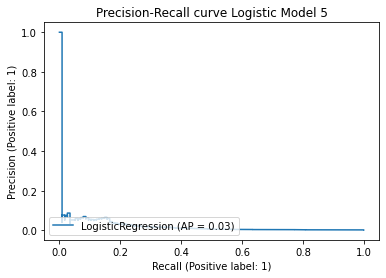

In [45]:
#subset attributes to predict (last 10 attributes)
ccf_train_sub3 = ccf_train.iloc[:,-10:]
ccf_test_sub3 = ccf_test.iloc[:,-10:]
print(ccf_train_sub3.columns)
lr_clf_sub3 = LogisticRegression(random_state=123).fit(ccf_train_sub3, train_y)
print(round(lr_clf_sub3.score(ccf_test_sub3, test_y)*100,2), "% Accuracy")
diplaysub = PrecisionRecallDisplay.from_estimator(lr_clf_sub3, ccf_test_sub3, test_y).ax_.set_title("Precision-Recall curve Logistic Model 5")

Index(['V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20'], dtype='object')
99.89 % Accuracy


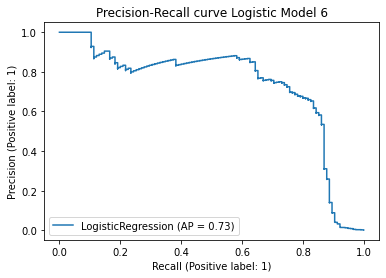

In [46]:
#subset attributes to predict (middle 10 attributes)
ccf_train_sub4 = ccf_train.iloc[:,10:20]
ccf_test_sub4= ccf_test.iloc[:,10:20]
print(ccf_train_sub4.columns)
lr_clf_sub4 = LogisticRegression(random_state=123).fit(ccf_train_sub4, train_y)
print(round(lr_clf_sub4.score(ccf_test_sub4, test_y)*100,2), "% Accuracy")
diplaysub = PrecisionRecallDisplay.from_estimator(lr_clf_sub4, ccf_test_sub4, test_y).ax_.set_title("Precision-Recall curve Logistic Model 6")

 Instead of using accuracy, a precision recall curve was used as our metric for assessing each of the models performance.
 This is due to the imbalanced ratio of fradualant and valid instances in the dataset.
 Given the different combinations of logistic models, the most efficient models ended up being:
* Logistic Model 3 (using the first 10 attributes to predict the target variable)
    * AP (average precision) score of 0.74 
    * Run time of 0.9 s

* Logistic Model 6 (using the middle 10 attributes to predict the target variable)
    * AP score of 0.73
    * run time of 0.6 s

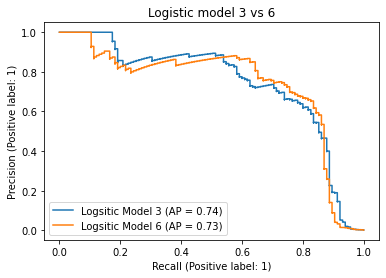

In [90]:
#plot two best models
fig, ax = plt.subplots()
ax.set_title('Logistic model 3 vs 6')
display = PrecisionRecallDisplay.from_estimator(lr_clf_sub, ccf_test_sub, test_y,ax = ax, name = "Logsitic Model 3")
display= PrecisionRecallDisplay.from_estimator(lr_clf_sub4, ccf_test_sub4, test_y,ax = ax, name = "Logsitic Model 6")
plt.savefig('bestLM_ccf.png')


When the two precision recall curves are overlaid for the two models we can see a slight difference between the two which averages out to about the same average area. Run time is also pretty comparable with 0.3 s difference. Given more context to the selected attributes, practical importance may provide better opportunity to choose between the two models. 

# K Neighbors Classifier Implementation

Next, the K Neighbors Classifier is used predict whether or not the transaction is fradulant or not.

We will use same dataframe split for training that we used for the previous model training.

In [93]:
KNN_ccf = KNeighborsClassifier()
KNN_ccf.fit(X = ccf_train, y= train_y)


KNeighborsClassifier()

99.92 % Accuracy


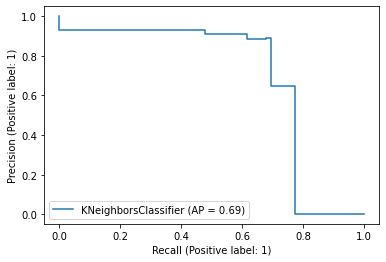

In [65]:

display = PrecisionRecallDisplay.from_estimator(KNN_ccf, ccf_test, test_y)

In [92]:
KNN_ccf1 = make_pipeline(StandardScaler(),KNeighborsClassifier())
KNN_ccf1.fit(X = ccf_train, y= train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

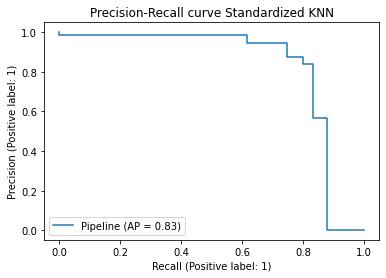

In [94]:
display = PrecisionRecallDisplay.from_estimator(KNN_ccf1, ccf_test, test_y).ax_.set_title("Precision-Recall curve Standardized KNN")
plt.savefig('bestKNN_ccf.png')

AttributeError: 'list' object has no attribute 'savefig'

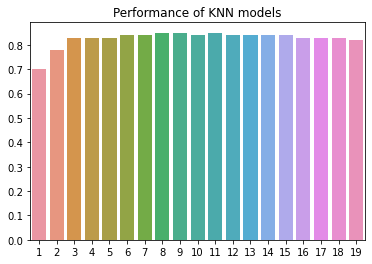

In [96]:
k_values = list(range(1,20))
AP_list = []
for k in k_values:
    KNN_ccf_k = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors = k))
    KNN_ccf_k.fit(X = ccf_train, y= train_y)
    AP = round(average_precision_score(test_y, KNN_ccf_k.predict_proba(ccf_test)[:,1]),2)
    AP_list.append(AP)
    



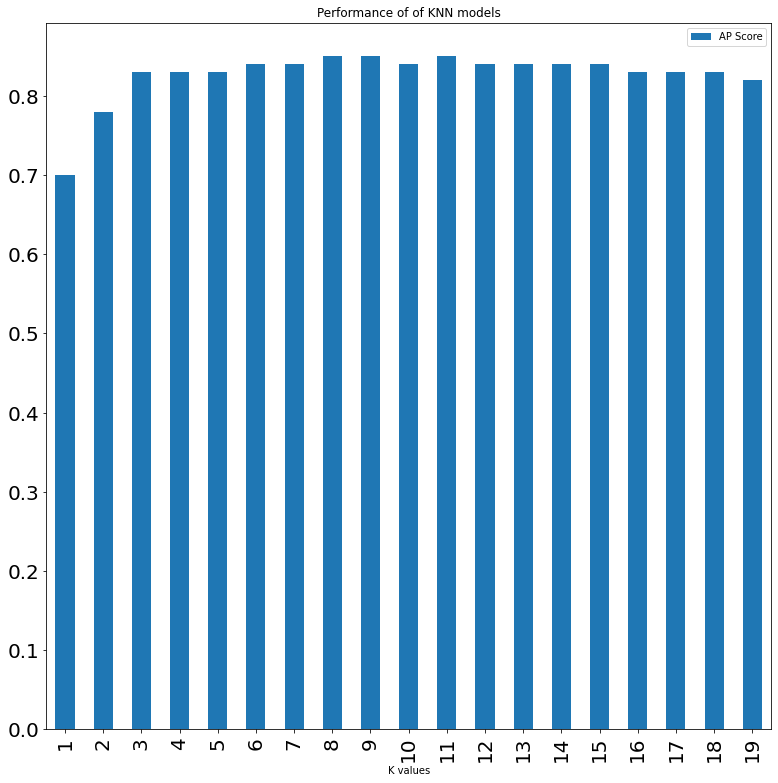

In [107]:
neigh_df = pd.DataFrame(k_values,columns = ["K values"])
neigh_df["AP Score"] = AP_list

neigh_bar = neigh_df.plot(kind = 'bar',x = "K values", y = "AP Score", figsize = (13,13),title = "Performance of of KNN models", 
    fontsize = 20)
plt.savefig('PerfKNN.png')

In [97]:
KNN_ccf2 = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors = 8))
KNN_ccf2.fit(X = ccf_train, y= train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=8))])

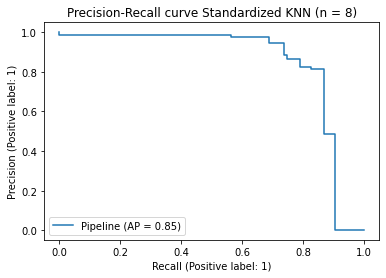

In [98]:
display = PrecisionRecallDisplay.from_estimator(KNN_ccf2, ccf_test, test_y).ax_.set_title("Precision-Recall curve Standardized KNN (n = 8)")
plt.savefig('bestKNN_ccf.png')

Based on analysis of different values of k; 8 and 9 seem to provide the highest average precision score. 
Given this analysis, the best model to implement for predicting credit card fraud transactions is a standardized KNearest Neighbors algorithim with n_neighbors set to 8.

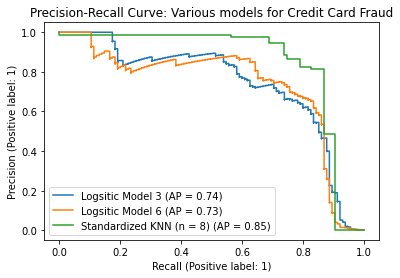

In [108]:
fig, ax = plt.subplots()
ax.set_title('Precision-Recall Curve: Various models for Credit Card Fraud')
display = PrecisionRecallDisplay.from_estimator(lr_clf_sub, ccf_test_sub, test_y,ax = ax, name = "Logsitic Model 3")
display= PrecisionRecallDisplay.from_estimator(lr_clf_sub4, ccf_test_sub4, test_y,ax = ax, name = "Logsitic Model 6")
display = PrecisionRecallDisplay.from_estimator(KNN_ccf2, ccf_test, test_y, ax = ax, name = "Standardized KNN (n = 8)")
plt.savefig('bestModel_ccf.png')